## РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ



In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split

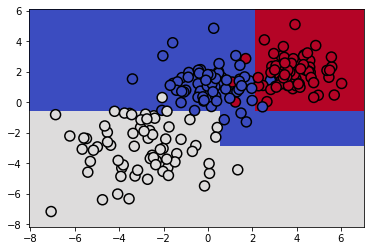

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);


Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

In [7]:
data = pd.read_csv('./Unit_6_data/bill_authentication.csv')

In [9]:
X = data.drop(columns='Class')
y = data.Class

### Задание 5.2.3
Обучите на предложенных данных решающее дерево.   
Целевой переменной здесь является переменная Class.  
Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева.   
Максимальную глубину дерева примите за 3 , максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2.  
Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

classifier = DecisionTreeClassifier()